# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
from tensorflow.python import keras

# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
def train(optimizer_name):
    ## 超參數設定
    """
    Set your required experiment parameters
    """
    LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
    EPOCHS = 50
    BATCH_SIZE = 256
    results = {}
    """
    建立你的訓練與實驗迴圈並蒐集資料
    """
    for lr in LEARNING_RATE:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR = %.6f" % (lr))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        if optimizer_name == 'SGD':
            optimizer = keras.optimizers.SGD(lr=lr, momentum=0.95)
        if optimizer_name == 'RMSprop':
            optimizer = keras.optimizers.RMSprop(lr=lr)
        if optimizer_name == 'Adagrad':
            optimizer = keras.optimizers.Adagrad(lr=lr)
        if optimizer_name == 'Adam':
            optimizer = keras.optimizers.Adam(lr=lr)
            
        model.compile(loss="categorical_crossentropy", metrics=["acc"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-lr-%s" % str(lr)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}
        
    import matplotlib.pyplot as plt
    %matplotlib inline
    """
    將實驗結果繪出
    """
    %matplotlib inline
    color_bar = ["r", "g", "b", "y", "m", "k"]

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    plt.title(optimizer_name + " - Loss")
    plt.legend()
    plt.show()

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    plt.title(optimizer_name + " - Accuracy")
    plt.legend()
    plt.show()


# SGD

Experiment with LR = 0.100000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=============

Epoch 1/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.8903 - acc: 0.3167 - val_loss: 1.7732 - val_acc: 0.3484
Epoch 2/50
50000/50000 [==============================] - 2s 33us/sample - loss: 1.6669 - acc: 0.4057 - val_loss: 1.6392 - val_acc: 0.4229
Epoch 3/50
50000/50000 [==============================] - 2s 33us/sample - loss: 1.5887 - acc: 0.4331 - val_loss: 1.5872 - val_acc: 0.4284
Epoch 4/50
50000/50000 [==============================] - 2s 33us/sample - loss: 1.5250 - acc: 0.4571 - val_loss: 1.5282 - val_acc: 0.4511
Epoch 5/50
50000/50000 [==============================] - 2s 33us/sample - loss: 1.4936 - acc: 0.4671 - val_loss: 1.4716 - val_acc: 0.4708
Epoch 6/50
50000/50000 [==============================] - 2s 33us/sample - loss: 1.4494 - acc: 0.4819 - val_loss: 1.5048 - val_acc: 0.4651
Epoch 7/50
50000/50000 [==============================] - 2s 33us/sample - loss: 1.4257 - acc: 0.4900 - val_loss: 1.4638 - val_acc: 0.4798
Epoch 8/50
50000/50000 [===

Epoch 2/50
50000/50000 [==============================] - 2s 35us/sample - loss: 1.8059 - acc: 0.3667 - val_loss: 1.7589 - val_acc: 0.3823
Epoch 3/50
50000/50000 [==============================] - 2s 34us/sample - loss: 1.7308 - acc: 0.3906 - val_loss: 1.6967 - val_acc: 0.3989
Epoch 4/50
50000/50000 [==============================] - 2s 35us/sample - loss: 1.6712 - acc: 0.4114 - val_loss: 1.6469 - val_acc: 0.4209
Epoch 5/50
50000/50000 [==============================] - 2s 35us/sample - loss: 1.6340 - acc: 0.4282 - val_loss: 1.6274 - val_acc: 0.4254
Epoch 6/50
50000/50000 [==============================] - 2s 35us/sample - loss: 1.5966 - acc: 0.4373 - val_loss: 1.5973 - val_acc: 0.4348
Epoch 7/50
50000/50000 [==============================] - 2s 36us/sample - loss: 1.5662 - acc: 0.4496 - val_loss: 1.5770 - val_acc: 0.4443
Epoch 8/50
50000/50000 [==============================] - 2s 35us/sample - loss: 1.5355 - acc: 0.4586 - val_loss: 1.5519 - val_acc: 0.4480
Epoch 9/50
50000/50000 [===

Epoch 3/50
50000/50000 [==============================] - 2s 33us/sample - loss: 2.0603 - acc: 0.2891 - val_loss: 2.0264 - val_acc: 0.3069
Epoch 4/50
50000/50000 [==============================] - 2s 33us/sample - loss: 2.0005 - acc: 0.3086 - val_loss: 1.9749 - val_acc: 0.3218
Epoch 5/50
50000/50000 [==============================] - 2s 33us/sample - loss: 1.9558 - acc: 0.3247 - val_loss: 1.9354 - val_acc: 0.3304
Epoch 6/50
50000/50000 [==============================] - 2s 33us/sample - loss: 1.9205 - acc: 0.3343 - val_loss: 1.9043 - val_acc: 0.3445
Epoch 7/50
50000/50000 [==============================] - 2s 33us/sample - loss: 1.8924 - acc: 0.3429 - val_loss: 1.8801 - val_acc: 0.3473
Epoch 8/50
50000/50000 [==============================] - 2s 32us/sample - loss: 1.8700 - acc: 0.3502 - val_loss: 1.8588 - val_acc: 0.3553
Epoch 9/50
50000/50000 [==============================] - 2s 33us/sample - loss: 1.8514 - acc: 0.3557 - val_loss: 1.8433 - val_acc: 0.3567
Epoch 10/50
50000/50000 [==

Epoch 4/50
50000/50000 [==============================] - 2s 33us/sample - loss: 2.2508 - acc: 0.1672 - val_loss: 2.2428 - val_acc: 0.1750
Epoch 5/50
50000/50000 [==============================] - 2s 34us/sample - loss: 2.2346 - acc: 0.1795 - val_loss: 2.2272 - val_acc: 0.1857
Epoch 6/50
50000/50000 [==============================] - 2s 34us/sample - loss: 2.2193 - acc: 0.1899 - val_loss: 2.2123 - val_acc: 0.1981
Epoch 7/50
50000/50000 [==============================] - 2s 35us/sample - loss: 2.2048 - acc: 0.2013 - val_loss: 2.1983 - val_acc: 0.2082
Epoch 8/50
50000/50000 [==============================] - 2s 35us/sample - loss: 2.1910 - acc: 0.2119 - val_loss: 2.1850 - val_acc: 0.2173
Epoch 9/50
50000/50000 [==============================] - 2s 35us/sample - loss: 2.1779 - acc: 0.2222 - val_loss: 2.1724 - val_acc: 0.2276
Epoch 10/50
50000/50000 [==============================] - 2s 35us/sample - loss: 2.1655 - acc: 0.2296 - val_loss: 2.1605 - val_acc: 0.2369
Epoch 11/50
50000/50000 [=

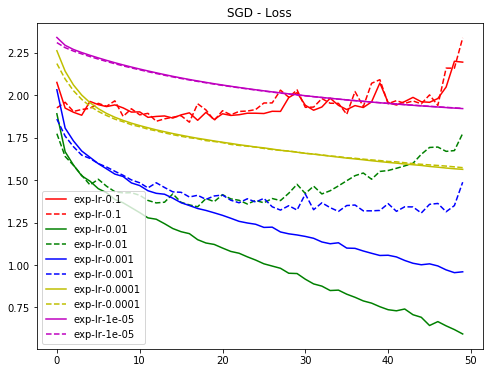

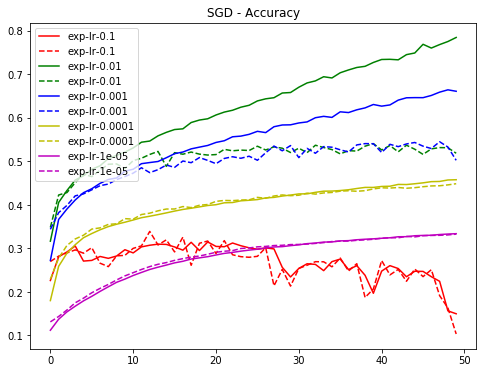

In [7]:
train(optimizer_name='SGD')

# RMSprop

Experiment with LR = 0.100000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=============

Epoch 1/50
50000/50000 [==============================] - 2s 43us/sample - loss: 10.3559 - acc: 0.1100 - val_loss: 2.3264 - val_acc: 0.1046
Epoch 2/50
50000/50000 [==============================] - 2s 37us/sample - loss: 2.3125 - acc: 0.1493 - val_loss: 2.2054 - val_acc: 0.1521
Epoch 3/50
50000/50000 [==============================] - 2s 37us/sample - loss: 2.1696 - acc: 0.1703 - val_loss: 2.1115 - val_acc: 0.1729
Epoch 4/50
50000/50000 [==============================] - 2s 38us/sample - loss: 2.1105 - acc: 0.1933 - val_loss: 2.1102 - val_acc: 0.1897
Epoch 5/50
50000/50000 [==============================] - 2s 37us/sample - loss: 2.0448 - acc: 0.2345 - val_loss: 2.0108 - val_acc: 0.2440
Epoch 6/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.9920 - acc: 0.2615 - val_loss: 1.9793 - val_acc: 0.2604
Epoch 7/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.9637 - acc: 0.2733 - val_loss: 1.9013 - val_acc: 0.3000
Epoch 8/50
50000/50000 [==

Epoch 2/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.8789 - acc: 0.3190 - val_loss: 1.7969 - val_acc: 0.3512
Epoch 3/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.7852 - acc: 0.3570 - val_loss: 1.7537 - val_acc: 0.3660
Epoch 4/50
50000/50000 [==============================] - 2s 38us/sample - loss: 1.7074 - acc: 0.3888 - val_loss: 1.7367 - val_acc: 0.3726
Epoch 5/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.6529 - acc: 0.4102 - val_loss: 1.7612 - val_acc: 0.3655
Epoch 6/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.6055 - acc: 0.4259 - val_loss: 1.6980 - val_acc: 0.3958
Epoch 7/50
50000/50000 [==============================] - 2s 38us/sample - loss: 1.5671 - acc: 0.4402 - val_loss: 1.7441 - val_acc: 0.3813
Epoch 8/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.5293 - acc: 0.4527 - val_loss: 1.7502 - val_acc: 0.3878
Epoch 9/50
50000/50000 [===

Epoch 3/50
50000/50000 [==============================] - 2s 36us/sample - loss: 1.7114 - acc: 0.3919 - val_loss: 1.7402 - val_acc: 0.3841
Epoch 4/50
50000/50000 [==============================] - 2s 36us/sample - loss: 1.6539 - acc: 0.4117 - val_loss: 1.7020 - val_acc: 0.3832
Epoch 5/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.6089 - acc: 0.4308 - val_loss: 1.6078 - val_acc: 0.4273
Epoch 6/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.5715 - acc: 0.4456 - val_loss: 1.6345 - val_acc: 0.4177
Epoch 7/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.5413 - acc: 0.4545 - val_loss: 1.6340 - val_acc: 0.4142
Epoch 8/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.5121 - acc: 0.4646 - val_loss: 1.5631 - val_acc: 0.4445
Epoch 9/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.4874 - acc: 0.4728 - val_loss: 1.5402 - val_acc: 0.4446
Epoch 10/50
50000/50000 [==

Epoch 4/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.8219 - acc: 0.3666 - val_loss: 1.8053 - val_acc: 0.3732
Epoch 5/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.7878 - acc: 0.3766 - val_loss: 1.7776 - val_acc: 0.3757
Epoch 6/50
50000/50000 [==============================] - 2s 36us/sample - loss: 1.7607 - acc: 0.3862 - val_loss: 1.7652 - val_acc: 0.3790
Epoch 7/50
50000/50000 [==============================] - 2s 38us/sample - loss: 1.7376 - acc: 0.3951 - val_loss: 1.7341 - val_acc: 0.4001
Epoch 8/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.7178 - acc: 0.4006 - val_loss: 1.7162 - val_acc: 0.4046
Epoch 9/50
50000/50000 [==============================] - 2s 38us/sample - loss: 1.6999 - acc: 0.4078 - val_loss: 1.7023 - val_acc: 0.4080
Epoch 10/50
50000/50000 [==============================] - 2s 38us/sample - loss: 1.6840 - acc: 0.4128 - val_loss: 1.6906 - val_acc: 0.4113
Epoch 11/50
50000/50000 [=

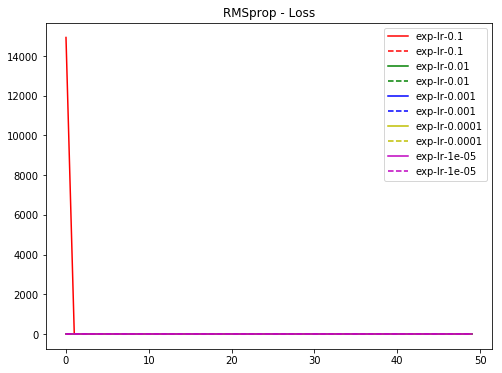

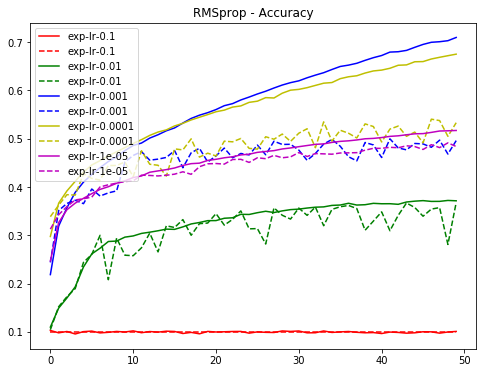

In [8]:
train(optimizer_name='RMSprop')

# Adagrad

Experiment with LR = 0.100000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=============

Epoch 1/50
50000/50000 [==============================] - 2s 42us/sample - loss: 3.2266 - acc: 0.2201 - val_loss: 1.9420 - val_acc: 0.3079
Epoch 2/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.8822 - acc: 0.3209 - val_loss: 1.8247 - val_acc: 0.3442
Epoch 3/50
50000/50000 [==============================] - 2s 36us/sample - loss: 1.7719 - acc: 0.3660 - val_loss: 1.7469 - val_acc: 0.3664
Epoch 4/50
50000/50000 [==============================] - 2s 36us/sample - loss: 1.7105 - acc: 0.3902 - val_loss: 1.6796 - val_acc: 0.4099
Epoch 5/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.6643 - acc: 0.4054 - val_loss: 1.7380 - val_acc: 0.3767
Epoch 6/50
50000/50000 [==============================] - 2s 36us/sample - loss: 1.6255 - acc: 0.4201 - val_loss: 1.7313 - val_acc: 0.3827
Epoch 7/50
50000/50000 [==============================] - 2s 36us/sample - loss: 1.5932 - acc: 0.4360 - val_loss: 1.6386 - val_acc: 0.4115
Epoch 8/50
50000/50000 [===

Epoch 2/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.8166 - acc: 0.3566 - val_loss: 1.7736 - val_acc: 0.3714
Epoch 3/50
50000/50000 [==============================] - 2s 36us/sample - loss: 1.7446 - acc: 0.3856 - val_loss: 1.7261 - val_acc: 0.3847
Epoch 4/50
50000/50000 [==============================] - 2s 36us/sample - loss: 1.6965 - acc: 0.4036 - val_loss: 1.6803 - val_acc: 0.4092
Epoch 5/50
50000/50000 [==============================] - 2s 36us/sample - loss: 1.6583 - acc: 0.4160 - val_loss: 1.6512 - val_acc: 0.4216
Epoch 6/50
50000/50000 [==============================] - 2s 36us/sample - loss: 1.6291 - acc: 0.4309 - val_loss: 1.6246 - val_acc: 0.4284
Epoch 7/50
50000/50000 [==============================] - 2s 36us/sample - loss: 1.6050 - acc: 0.4356 - val_loss: 1.6303 - val_acc: 0.4313
Epoch 8/50
50000/50000 [==============================] - 2s 38us/sample - loss: 1.5841 - acc: 0.4444 - val_loss: 1.6207 - val_acc: 0.4259
Epoch 9/50
50000/50000 [===

Epoch 3/50
50000/50000 [==============================] - 2s 38us/sample - loss: 1.8898 - acc: 0.3480 - val_loss: 1.8755 - val_acc: 0.3526
Epoch 4/50
50000/50000 [==============================] - 2s 38us/sample - loss: 1.8625 - acc: 0.3567 - val_loss: 1.8532 - val_acc: 0.3563
Epoch 5/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.8425 - acc: 0.3624 - val_loss: 1.8377 - val_acc: 0.3643
Epoch 6/50
50000/50000 [==============================] - 2s 38us/sample - loss: 1.8267 - acc: 0.3678 - val_loss: 1.8214 - val_acc: 0.3695
Epoch 7/50
50000/50000 [==============================] - 2s 38us/sample - loss: 1.8133 - acc: 0.3727 - val_loss: 1.8100 - val_acc: 0.3755
Epoch 8/50
50000/50000 [==============================] - 2s 38us/sample - loss: 1.8022 - acc: 0.3771 - val_loss: 1.7997 - val_acc: 0.3771
Epoch 9/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.7926 - acc: 0.3791 - val_loss: 1.7909 - val_acc: 0.3833
Epoch 10/50
50000/50000 [==

Epoch 4/50
50000/50000 [==============================] - 2s 38us/sample - loss: 2.1754 - acc: 0.2327 - val_loss: 2.1660 - val_acc: 0.2456
Epoch 5/50
50000/50000 [==============================] - 2s 38us/sample - loss: 2.1627 - acc: 0.2407 - val_loss: 2.1544 - val_acc: 0.2520
Epoch 6/50
50000/50000 [==============================] - 2s 38us/sample - loss: 2.1520 - acc: 0.2460 - val_loss: 2.1445 - val_acc: 0.2569
Epoch 7/50
50000/50000 [==============================] - 2s 38us/sample - loss: 2.1427 - acc: 0.2510 - val_loss: 2.1358 - val_acc: 0.2596
Epoch 8/50
50000/50000 [==============================] - 2s 38us/sample - loss: 2.1345 - acc: 0.2527 - val_loss: 2.1282 - val_acc: 0.2600
Epoch 9/50
50000/50000 [==============================] - 2s 38us/sample - loss: 2.1271 - acc: 0.2558 - val_loss: 2.1212 - val_acc: 0.2618
Epoch 10/50
50000/50000 [==============================] - 2s 37us/sample - loss: 2.1203 - acc: 0.2576 - val_loss: 2.1148 - val_acc: 0.2647
Epoch 11/50
50000/50000 [=

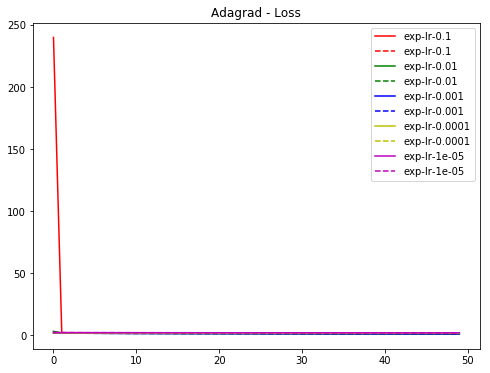

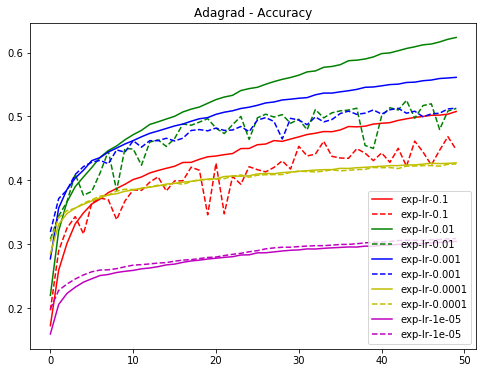

In [9]:
train(optimizer_name='Adagrad')

# Adam

Experiment with LR = 0.100000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=============

Epoch 1/50
50000/50000 [==============================] - 2s 45us/sample - loss: 3.3369 - acc: 0.2340 - val_loss: 1.8504 - val_acc: 0.3296
Epoch 2/50
50000/50000 [==============================] - 2s 41us/sample - loss: 1.8392 - acc: 0.3306 - val_loss: 1.8453 - val_acc: 0.3309
Epoch 3/50
50000/50000 [==============================] - 2s 40us/sample - loss: 1.7682 - acc: 0.3560 - val_loss: 1.7355 - val_acc: 0.3653
Epoch 4/50
50000/50000 [==============================] - 2s 39us/sample - loss: 1.7233 - acc: 0.3755 - val_loss: 1.6983 - val_acc: 0.3864
Epoch 5/50
50000/50000 [==============================] - 2s 40us/sample - loss: 1.7084 - acc: 0.3831 - val_loss: 1.6969 - val_acc: 0.3868
Epoch 6/50
50000/50000 [==============================] - 2s 40us/sample - loss: 1.6758 - acc: 0.3948 - val_loss: 1.6770 - val_acc: 0.3960
Epoch 7/50
50000/50000 [==============================] - 2s 39us/sample - loss: 1.6579 - acc: 0.4034 - val_loss: 1.6885 - val_acc: 0.3880
Epoch 8/50
50000/50000 [===

Epoch 2/50
50000/50000 [==============================] - 2s 40us/sample - loss: 1.7070 - acc: 0.3898 - val_loss: 1.6524 - val_acc: 0.4085
Epoch 3/50
50000/50000 [==============================] - 2s 40us/sample - loss: 1.6289 - acc: 0.4178 - val_loss: 1.6274 - val_acc: 0.4209
Epoch 4/50
50000/50000 [==============================] - 2s 38us/sample - loss: 1.5485 - acc: 0.4467 - val_loss: 1.5268 - val_acc: 0.4605
Epoch 5/50
50000/50000 [==============================] - 2s 39us/sample - loss: 1.5037 - acc: 0.4659 - val_loss: 1.4999 - val_acc: 0.4653
Epoch 6/50
50000/50000 [==============================] - 2s 40us/sample - loss: 1.4636 - acc: 0.4771 - val_loss: 1.4976 - val_acc: 0.4648
Epoch 7/50
50000/50000 [==============================] - 2s 40us/sample - loss: 1.4394 - acc: 0.4869 - val_loss: 1.4670 - val_acc: 0.4757
Epoch 8/50
50000/50000 [==============================] - 2s 39us/sample - loss: 1.4087 - acc: 0.4976 - val_loss: 1.4634 - val_acc: 0.4757
Epoch 9/50
50000/50000 [===

Epoch 3/50
50000/50000 [==============================] - 2s 40us/sample - loss: 1.6329 - acc: 0.4251 - val_loss: 1.6283 - val_acc: 0.4187
Epoch 4/50
50000/50000 [==============================] - 2s 41us/sample - loss: 1.5780 - acc: 0.4444 - val_loss: 1.5803 - val_acc: 0.4415
Epoch 5/50
50000/50000 [==============================] - 2s 40us/sample - loss: 1.5280 - acc: 0.4628 - val_loss: 1.5610 - val_acc: 0.4463
Epoch 6/50
50000/50000 [==============================] - 2s 41us/sample - loss: 1.4932 - acc: 0.4754 - val_loss: 1.4992 - val_acc: 0.4690
Epoch 7/50
50000/50000 [==============================] - 2s 40us/sample - loss: 1.4625 - acc: 0.4867 - val_loss: 1.4925 - val_acc: 0.4632
Epoch 8/50
50000/50000 [==============================] - 2s 41us/sample - loss: 1.4284 - acc: 0.4989 - val_loss: 1.4630 - val_acc: 0.4767
Epoch 9/50
50000/50000 [==============================] - 2s 40us/sample - loss: 1.4069 - acc: 0.5060 - val_loss: 1.4601 - val_acc: 0.4830
Epoch 10/50
50000/50000 [==

Epoch 4/50
50000/50000 [==============================] - 2s 40us/sample - loss: 1.8130 - acc: 0.3705 - val_loss: 1.7957 - val_acc: 0.3862
Epoch 5/50
50000/50000 [==============================] - 2s 40us/sample - loss: 1.7761 - acc: 0.3857 - val_loss: 1.7668 - val_acc: 0.3851
Epoch 6/50
50000/50000 [==============================] - 2s 41us/sample - loss: 1.7464 - acc: 0.3967 - val_loss: 1.7379 - val_acc: 0.3981
Epoch 7/50
50000/50000 [==============================] - 2s 41us/sample - loss: 1.7202 - acc: 0.4068 - val_loss: 1.7154 - val_acc: 0.4062
Epoch 8/50
50000/50000 [==============================] - 2s 40us/sample - loss: 1.6995 - acc: 0.4131 - val_loss: 1.6961 - val_acc: 0.4103
Epoch 9/50
50000/50000 [==============================] - 2s 40us/sample - loss: 1.6799 - acc: 0.4204 - val_loss: 1.6773 - val_acc: 0.4178
Epoch 10/50
50000/50000 [==============================] - 2s 41us/sample - loss: 1.6624 - acc: 0.4253 - val_loss: 1.6670 - val_acc: 0.4210
Epoch 11/50
50000/50000 [=

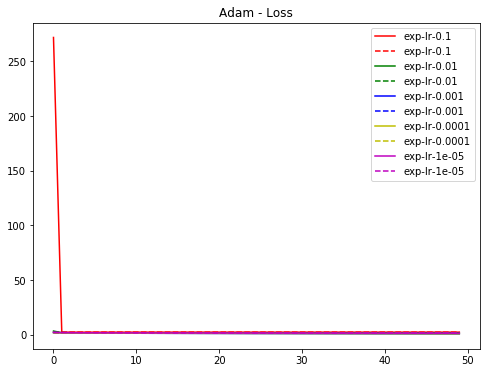

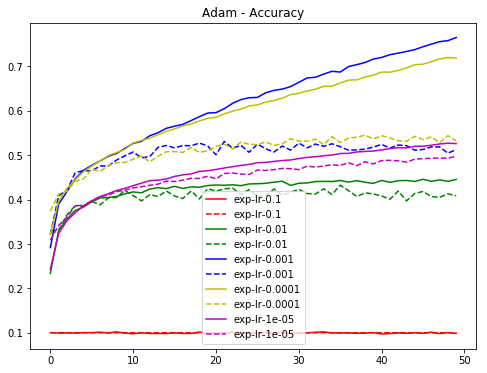

In [10]:
train(optimizer_name='Adam')